## Import Libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [2]:
store_data = pd.read_csv('../data/store.csv', na_values=['?', None, 'undefined'])
train_data = pd.read_csv('../data/train.csv', na_values=['?', None, 'undefined'])
test_data = pd.read_csv('../data/test.csv', na_values=['?', None, 'undefined'])
submission_data = pd.read_csv('../data/sample_submission.csv', na_values=['?', None, 'undefined'])

## Data visualization

In [3]:
# store data
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
# check missing values
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [5]:
# train data
train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
# check missing values for train data
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
#test data
test_data.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
# check missing values for test data
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [9]:
# sample submission data
submission_data.head(5)

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [10]:
# check missing values
submission_data.isnull().sum()

Id       0
Sales    0
dtype: int64

In [11]:
# columns for each data
print(f'\t Store Columns \n{list(store_data.columns)}\n')
print(f'\t Train Columns \n{list(train_data.columns)}\n')
print(f'\t Test Columns\n {list(test_data.columns)}\n')
print(f'\t Submission Columns\n {list(submission_data.columns)}')

	 Store Columns 
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

	 Train Columns 
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

	 Test Columns
 ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

	 Submission Columns
 ['Id', 'Sales']


In [12]:
# shape for each data
print(f'\t Store shape: {store_data.shape}\n')
print(f'\t Train shape: {train_data.shape}\n')
print(f'\t Test shape: {test_data.shape}\n')
print(f'\t Submission shape: {submission_data.shape}')

	 Store shape: (1115, 10)

	 Train shape: (1017209, 9)

	 Test shape: (41088, 8)

	 Submission shape: (41088, 2)


In [13]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df, data_type):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print(f"The {data_type} dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(train_data, 'train')
percent_missing(test_data, 'test')

The train dataset contains 0.0 % missing values.
The test dataset contains 0.0 % missing values.


## Preprocessing

In [14]:
# change data formate 
train_data["Date"]=pd.to_datetime(train_data["Date"], format='%Y/%m/%d', errors='coerce')
test_data["Date"]=pd.to_datetime(test_data["Date"], format='%Y/%m/%d', errors='coerce')

In [16]:
#find the date part of the DatetimeIndex object.
def holiday(x):
    if x in ['a','b','c']:
        return 1
    return 0
    
def day_month_year(df, col):
    try:
        df['Day'] = pd.DatetimeIndex(df[col]).day
        df['Month'] = pd.DatetimeIndex(df[col]).month
        df['Year'] = pd.DatetimeIndex(df[col]).year
    except KeyError:
        print("Unknown Column Index")
    
train_data['Holiday'] = train_data['StateHoliday'].apply(holiday)
test_data['Holiday'] = test_data['StateHoliday'].apply(holiday)
train_data['Holiday'] = train_data['Holiday'] | train_data['SchoolHoliday']
test_data['Holiday'] = test_data['Holiday'] | test_data['SchoolHoliday']
day_month_year(train_data, 'Date') 
day_month_year(test_data, 'Date')

In [17]:
# drop missing value
test_data = test_data.dropna()
treain_data = train_data.dropna()

In [18]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Holiday,Day,Month,Year
count,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.0
mean,20548.560216,555.881832,3.979331,0.854322,0.395842,0.443606,0.447988,13.521435,8.353994,2015.0
std,11860.106172,320.315550,2.015529,0.352787,0.489037,0.496816,0.497293,8.449282,0.478213,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,2015.0
25%,10280.000000,279.000000,2.000000,1.000000,0.000000,0.000000,0.000000,6.000000,8.000000,2015.0
50%,20550.000000,553.000000,4.000000,1.000000,0.000000,0.000000,0.000000,13.000000,8.000000,2015.0
75%,30819.000000,833.000000,6.000000,1.000000,1.000000,1.000000,1.000000,20.000000,9.000000,2015.0
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,1.000000,31.000000,9.000000,2015.0


In [19]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Holiday,Day,Month,Year
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,1.939228e-01,1.570279e+01,5.846762e+00,2.013832e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,3.953693e-01,8.787638e+00,3.326097e+00,7.773960e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.013000e+03
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,3.000000e+00,2.013000e+03
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,6.000000e+00,2.014000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,8.000000e+00,2.014000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,1.200000e+01,2.015000e+03


## Analysis 

In [21]:
# Correlation between Sales and number of customers
train_data[['Customers','Sales']].corr()

,Customers,Sales
Customers,1.000000,0.894711
Sales,0.894711,1.000000


In [22]:
# Correlation between promo and sales
train_data[['Promo','Sales']].corr()

,Promo,Sales
Promo,1.000000,0.452345
Sales,0.452345,1.000000


In [24]:
# Correlation between promo, Customers and sales
train_data[['Promo', 'Customers','Sales']].corr()

,Promo,Customers,Sales
Promo,1.000000,0.316169,0.452345
Customers,0.316169,1.000000,0.894711
Sales,0.452345,0.894711,1.000000


In [30]:
promo_sale = train_data[['Promo','Sales']].groupby('Promo').mean().reset_index()
promo_sale

,Promo,Sales
0,0,4406.050805
1,1,7991.152046


In [31]:
promo_customers = train_data[['Promo','Customers']].groupby('Promo').mean().reset_index()
promo_customers

,Promo,Customers
0,0,517.823542
1,1,820.098815


In [43]:
# bar plot
def barPlot(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    #plt.bar(color ='maroon', width = 0.8)
    plt.show()

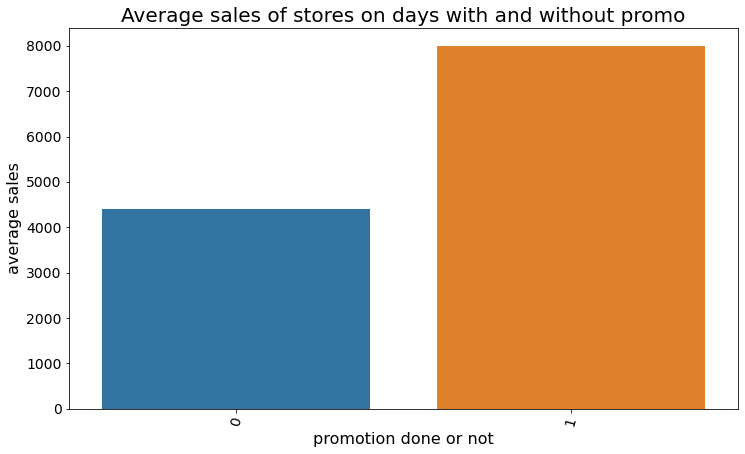

In [45]:
barPlot(promo_sale,'Promo', 'Sales', 'Average sales of stores on days with and without promo',\
        'promotion done or not', 'average sales')

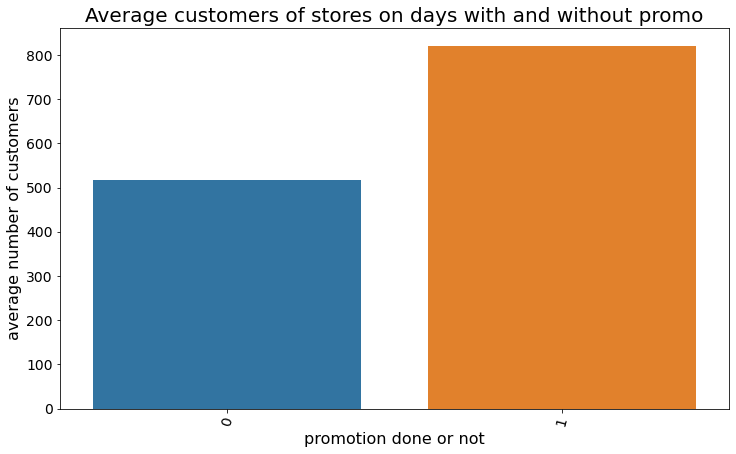

In [46]:
barPlot(promo_customers, 'Promo', 'Customers', 'Average customers of stores on days with and without promo', \
         'promotion done or not', 'average number of customers')

In [47]:
promo_data = train_data[['Store', 'Promo', 'Sales']].groupby('Store').mean().sort_values(['Sales'], \
          ascending=True).reset_index()
promo_data.describe()

,Store,Promo,Sales
count,1115.00000,1115.000000,1115.000000
mean,558.00000,0.381382,5763.320541
std,322.01708,0.001788,2046.447377
min,1.00000,0.377309,2244.503185
25%,279.50000,0.382166,4412.415567
50%,558.00000,0.382166,5459.185775
75%,836.50000,0.382166,6633.871550
max,1115.00000,0.382572,20718.515924


In [49]:
promo_data.head(10)

,Store,Promo,Sales
0,307,0.382166,2244.503185
1,543,0.382166,2313.468153
2,198,0.382166,2407.933121
3,208,0.382166,2443.791932
4,841,0.382166,2461.395966
5,254,0.382166,2485.839703
6,972,0.382166,2550.559448
7,794,0.382166,2553.475584
8,219,0.382166,2591.467091
9,210,0.382166,2641.309979


In [52]:
# stores opened in weekdays (open = 1)
week_data = train_data[['Store', 'DayOfWeek','Open', 'Sales','Customers']]
week_data = week_data[week_data['Open'] == 1]
storeW_data = week_data[['Store', 'DayOfWeek']].groupby('Store').nunique()
storeW_data = storeW_data[storeW_data['DayOfWeek'] == 7].reset_index()
storeW_data

,Store,DayOfWeek
0,85,7
1,122,7
2,209,7
3,259,7
4,262,7
5,274,7
6,299,7
7,310,7
8,335,7
9,353,7


In [57]:
weekends_data = week_data[week_data['Store'].isin(set(week_data['Store']))]
weekends_data.head()

,Store,DayOfWeek,Open,Sales,Customers
0,1,5,1,5263,555
1,2,5,1,6064,625
2,3,5,1,8314,821
3,4,5,1,13995,1498
4,5,5,1,4822,559
